<a href="https://colab.research.google.com/github/sedabicer/GlobalAIHubMachineLearningCourse/blob/main/Final%20Project/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SEDA BİÇER

EMAIL:xsedabicerx@gmail.com

Data

In [130]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [300]:
#Read the diamonds.csv file and describe it.
df = pd.read_csv('https://github.com/sedabicer/GlobalAIHubMachineLearningCourse/raw/main/Final%20Project/diamonds.csv')
df

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [302]:
# Analyse missing values
df.dropna()
df.isnull().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#**Exploratory Data Analysis**


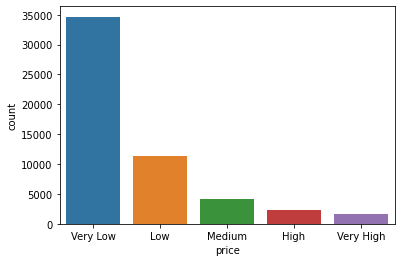

In [303]:
# Our label Distribution (countplot)

sns.countplot(x ='price', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


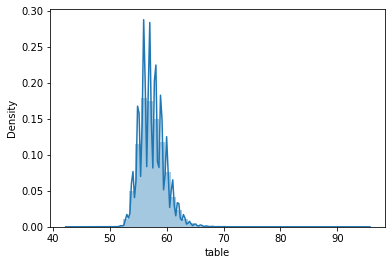

In [ ]:
# Example EDA (distplot)

sns.distplot(df['table'])             
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


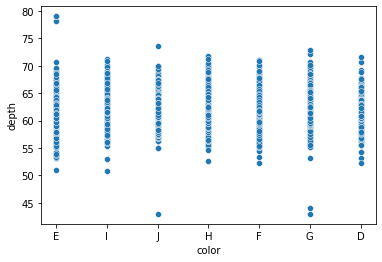

In [ ]:
#EDA using scatterplot
sns.scatterplot("color","depth",data=df);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


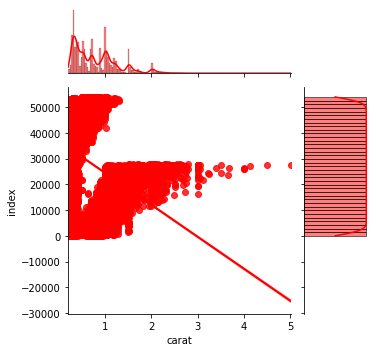

In [ ]:
#EDA using jointplot
sns.jointplot("carat", "index", data=df,height=5,kind="reg",ratio=3, color="r")

In [ ]:
column_names=['index','carat','cut','color','clarity','depth','table','x','y','z','price']

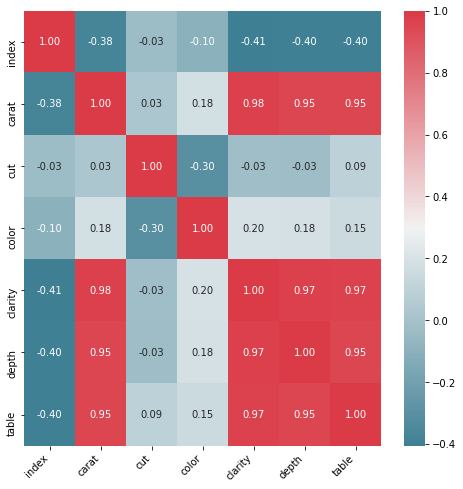

In [ ]:
# Correlation of the features
correlations = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(
    column_names,
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(column_names);
plt.show()

#**Preprocessing**

In [304]:
#Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
df.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [305]:
df.dropna()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [306]:
df.drop_duplicates()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


There is no duplicated value

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


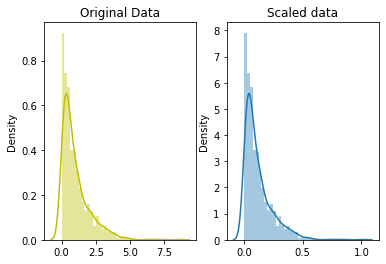

In [ ]:
#Do we need to do feature scaling?
#Do we need to generate new features?
from sklearn.preprocessing import minmax_scale

np.random.seed(0)
original_data = np.random.exponential(size = 1000)
scaled_data = minmax_scale(original_data)

fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

In [221]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [222]:
cut_class_dict = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}

In [223]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [235]:
clarity_dict = {"I3": 1, "I2": 2, "I1": 3, "SI2": 4, "SI1": 5, "VS2": 6, "VS1": 7, "VVS2": 8, "VVS1": 9, "IF": 10, "FL": 11}
color_dict = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}
price_dict={"Very Low":326}

In [307]:
df['cut'] = df['cut'].map(cut_class_dict)
df['clarity'] = df['clarity'].map(clarity_dict)
df['color'] = df['color'].map(color_dict)
df['price'] = df['price'].map(price_dict)
df.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,5,6,4,61.5,55.0,3.95,3.98,2.43,326.0
1,2,0.21,4,6,5,59.8,61.0,3.89,3.84,2.31,326.0
2,3,0.23,2,6,7,56.9,65.0,4.05,4.07,2.31,326.0
3,4,0.29,4,2,6,62.4,58.0,4.20,4.23,2.63,326.0
4,5,0.31,2,1,4,63.3,58.0,4.34,4.35,2.75,326.0


In [308]:
bins = (0,2,4,6)
group_names = ['very bad','bad','good']
df['carat'] = pd.cut(df['carat'], bins = bins, labels = group_names)
df.head(10)

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,very bad,5,6,4,61.5,55.0,3.95,3.98,2.43,326.0
1,2,very bad,4,6,5,59.8,61.0,3.89,3.84,2.31,326.0
2,3,very bad,2,6,7,56.9,65.0,4.05,4.07,2.31,326.0
3,4,very bad,4,2,6,62.4,58.0,4.20,4.23,2.63,326.0
4,5,very bad,2,1,4,63.3,58.0,4.34,4.35,2.75,326.0
5,6,very bad,3,1,8,62.8,57.0,3.94,3.96,2.48,326.0
6,7,very bad,3,2,9,62.3,57.0,3.95,3.98,2.47,326.0
7,8,very bad,3,3,5,61.9,55.0,4.07,4.11,2.53,326.0
8,9,very bad,1,6,6,65.1,61.0,3.87,3.78,2.49,326.0
9,10,very bad,3,3,7,59.4,61.0,4.00,4.05,2.39,326.0


In [240]:
from sklearn.preprocessing import LabelEncoder
label_carat = LabelEncoder()
# Bad becomes 0 and good becomes 1
df['carat'] = label_carat.fit_transform(df['carat'])
df['carat'].value_counts()


2    52051
0     1884
1        5
Name: carat, dtype: int64

In [309]:
X = df.drop('carat', axis=1)
y = df['carat']

In [310]:
# Splitting data as train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)
print(f"Number of training examples : {X_train.shape[0]} , Number of test examples : {X_test.shape[0]}")

Number of training examples : 37758 , Number of test examples : 16182


In [311]:
#Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.fit_transform (X_test)

#**ML ALGORITHMS**



In [312]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [313]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

# prepare models
models = []
models.append(('SupportVectorClassifier', SVC()))
models.append(('StochasticGradientDecentC', SGDClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('LogisticRegression', LogisticRegression()))


**1-)DecisionTree Classifier**

In [294]:
df.isnull().any()

index      False
carat      False
cut        False
color      False
clarity    False
depth      False
table      False
x          False
y          False
z          False
price      False
dtype: bool

In [296]:
df = df.fillna(lambda x: x.median())

In [327]:
df = df.dropna()

In [331]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score


clf = DecisionTreeClassifier(max_depth=4 , random_state=42)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))
print(classification_report(y_test,pred))
BiasTr = 1-(clf.score(X_train,y_train))
BiasTs = 1-(clf.score(X_test,y_test))
print("Bias for training = ",BiasTr)
print("Bias for test = ",BiasTs)
print("Variance = ", BiasTs-BiasTr,"\n")
#Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()


AttributeError: ignored

**2)KNeighborsClassifier** 

In [316]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))
print("\nBias for training:",1-clf.score(X_train,y_train))
print("Bias for test:",1-clf.score(X_test,y_test))

#Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

ValueError: ignored

**3) Support Vector Classifier (svc)**


In [317]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print("Accuracy of train:",svc.score(X_train,y_train))
print("Accuracy of test:",svc.score(X_test,y_test),"\n")
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))
# Metrics
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))
# Confusion Matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

ValueError: ignored

In [318]:
def svc_param_selection(X, y, nfolds):
    param = {
        'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
    }
    grid_search = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=nfolds)
    grid_search.fit(X,  y)
    return grid_search.best_params_

In [319]:
svc_param_selection(X_train, y_train,10)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarn

ValueError: ignored

In [320]:
svc2 = SVC(C = 1.3, gamma =  1.3, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_svc2))
print('Classification report')
print(classification_report(y_test, pred_svc2))
print('Accuracy score',accuracy_score(y_test, pred_svc2))

ValueError: ignored

**4) Random Forest Classifier**

In [321]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=20,
                             random_state=0)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", rfc.score(X_train, y_train))
print("Testing accuracy :", rfc.score(X_test, y_test))

ValueError: ignored

In [322]:
# classification report
print(classification_report(y_test, pred_rfc))

# confusion matrix
confusion_matrix(y_test, pred_rfc)

NameError: ignored

In [323]:
# Metrics
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

NameError: ignored

In [324]:
# Confusion Matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

NameError: ignored

#**Evaluation**